In [ ]:
pip install spacy

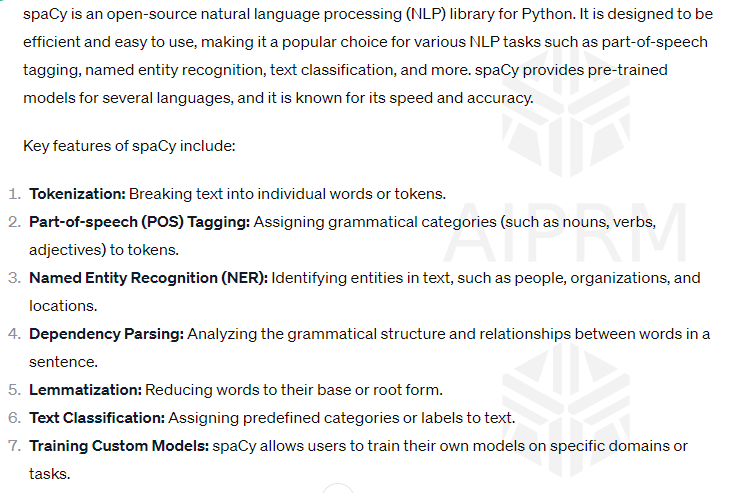

In [2]:
import pandas as pd
import spacy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import base64
import string
#import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df = pd.read_csv('research_paper.csv')
df.head()

,Title,Conference
0,Innovation in Database Management: Computer Sc...,VLDB
1,High performance prime field multiplication fo...,ISCAS
2,enchanted scissors: a scissor interface for su...,SIGGRAPH
3,Detection of channel degradation attack by Int...,INFOCOM
4,Pinning a Complex Network through the Betweenn...,ISCAS


In [3]:
df.isnull().sum()

Title         0
Conference    0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33, random_state=42)
print('Research title sample:', train['Title'].iloc[0])
print('Conference of this paper:', train['Conference'].iloc[0])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

Research title sample: Cooperating with Smartness: Using Heterogeneous Smart Antennas in Ad-Hoc Networks.
Conference of this paper: INFOCOM
Training Data Shape: (1679, 2)
Testing Data Shape: (828, 2)


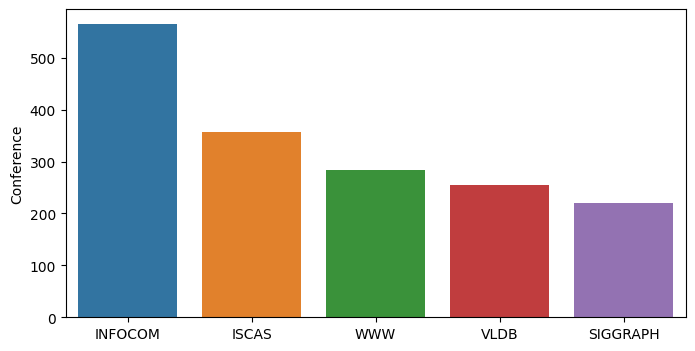

In [5]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x = train['Conference'].unique(), y=train['Conference'].value_counts())
plt.show()

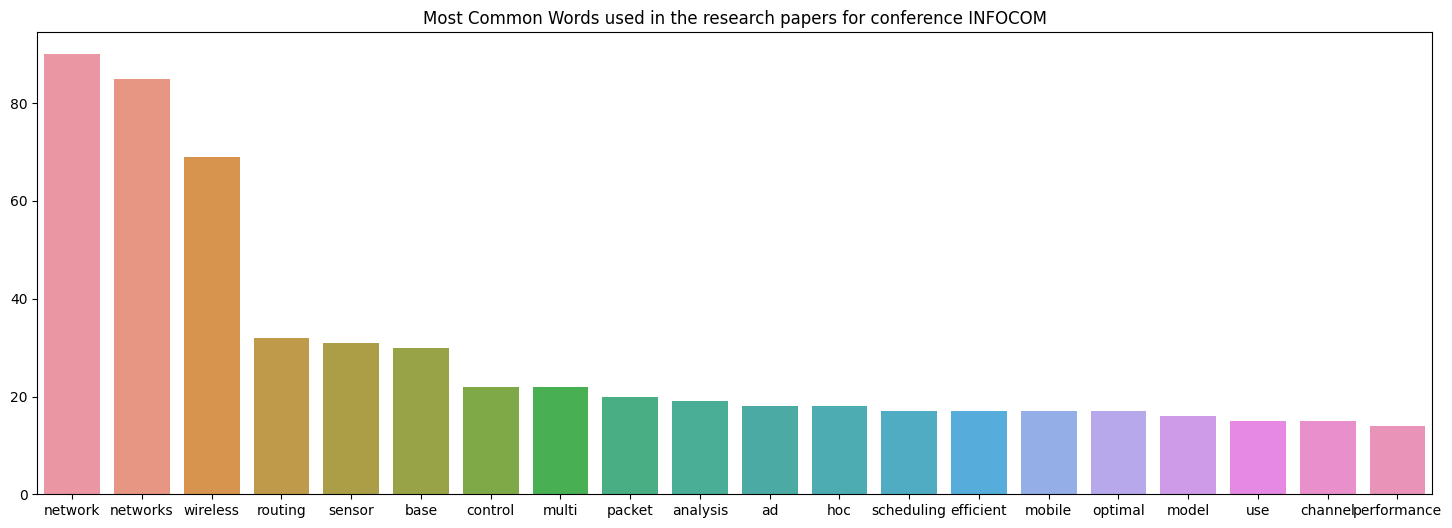

In [14]:
import spacy
nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)
INFO_text = [text for text in train[train['Conference'] == 'INFOCOM']['Title']]
INFO_clean = cleanup_text(INFO_text)
INFO_clean = ' '.join(INFO_clean).split()
INFO_counts = Counter(INFO_clean)
INFO_common_words = [word[0] for word in INFO_counts.most_common(20)]
INFO_common_counts = [word[1] for word in INFO_counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=INFO_common_words, y=INFO_common_counts)
plt.title('Most Common Words used in the research papers for conference INFOCOM')
plt.show()

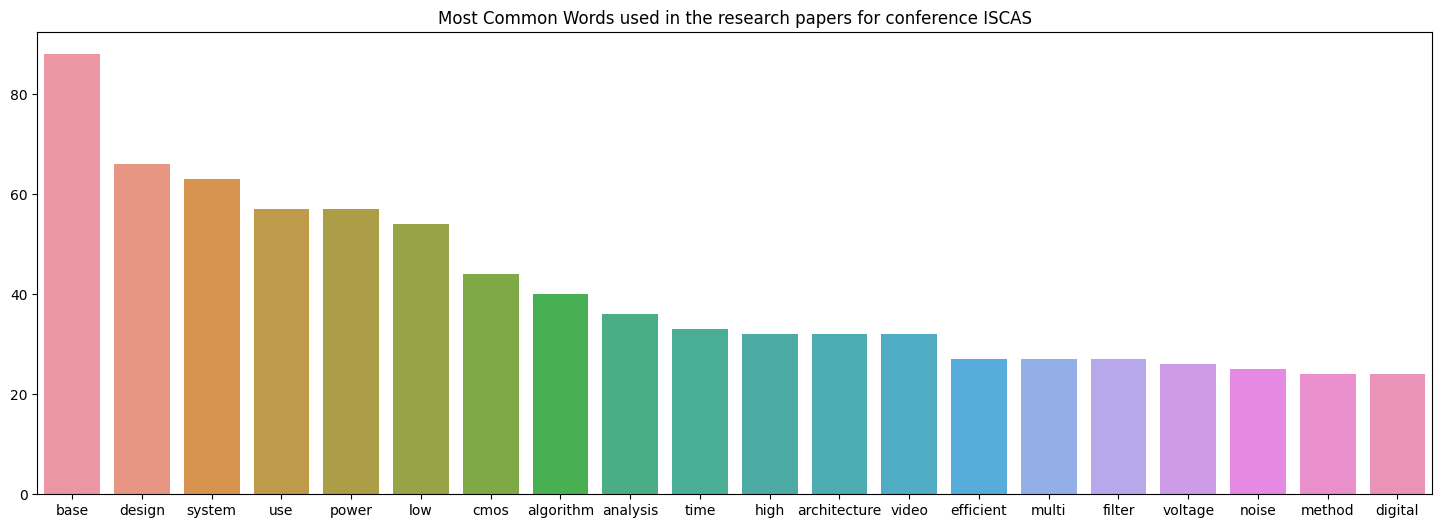

In [15]:
IS_text = [text for text in train[train['Conference'] == 'ISCAS']['Title']]
IS_clean = cleanup_text(IS_text)
IS_clean = ' '.join(IS_clean).split()
IS_counts = Counter(IS_clean)
IS_common_words = [word[0] for word in IS_counts.most_common(20)]
IS_common_counts = [word[1] for word in IS_counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=IS_common_words, y=IS_common_counts)
plt.title('Most Common Words used in the research papers for conference ISCAS')
plt.show()

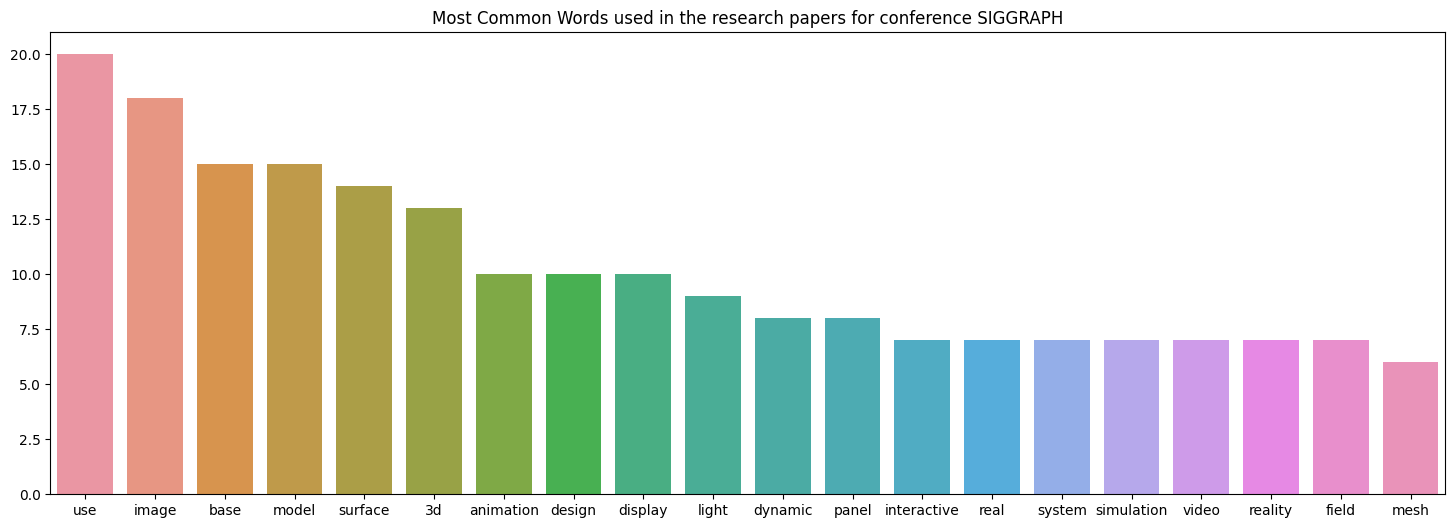

In [16]:

SIG_text = [text for text in train[train['Conference'] == 'SIGGRAPH']['Title']]
SIG_clean = cleanup_text(SIG_text)
SIG_clean = ' '.join(SIG_clean).split()
SIG_counts = Counter(SIG_clean)
SIG_common_words = [word[0] for word in SIG_counts.most_common(20)]
SIG_common_counts = [word[1] for word in SIG_counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=SIG_common_words, y=SIG_common_counts)
plt.title('Most Common Words used in the research papers for conference SIGGRAPH')
plt.show()